In [7]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

from KETIPrePartialDataPreprocessing import main
import setting
inputType ='file' # or file

In [8]:
setting.imputation_param

{'serialImputation': {'flag': True,
  'imputation_method': [{'min': 0,
    'max': 3,
    'method': 'mean',
    'parameter': {}},
   {'min': 4,
    'max': 6,
    'method': 'brits',
    'parameter': {'model_address': '/Users/bunnyjw/Git/KETIPrePartialDataPreprocessing/data_imputation/DL/brits/model/air_indoor_경로당/ICL1L2000234'}}],
  'totalNanLimit': 20}}

In [9]:
# Declare your own data
input_data = main.inputControl(inputType)
# Make noise
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

In [10]:
# Preprocessing
from KETIPrePartialDataPreprocessing import data_preprocessing
#column_name ='in_temp'
input_data =  input_test_data[:2000]
partialP = data_preprocessing.packagedPartialProcessing(setting.process_param)
output = partialP.allPartialProcessing(input_data)

getDataWithCertainNaN
getDataWithUncertainNaN
0.48619072433559146 0.5834288692027098
1.261046216353479 1.5132554596241747
24.444416624937407 29.333299949924886
===== NaN data Ratio summary ======
temp    0.04
co2     0.02
pm10    0.00
dtype: float64
birts_imputation
No Brits Model File
No Brits Model File
No Brits Model File
No Brits Model File
No Brits Model File
No Brits Model File
No Brits Model File
No Brits Model File
No Brits Model File
===== NaN data Ratio summary ======
pm10    0.0
dtype: float64


key:  original Data Leangth: 2000 Data NaN Length: temp    81
co2     31
pm10     0
dtype: int64
                     temp  co2    pm10
timedate                              
2021-01-28 12:51:00   3.0  5.0 -9999.0
2021-01-28 12:52:00   3.0  5.0    64.0
2021-01-28 12:53:00   NaN  6.0    56.0
2021-01-28 12:54:00   NaN  7.0    59.0
2021-01-28 12:55:00   NaN  7.0    59.0
...                   ...  ...     ...
2021-01-29 22:09:00   1.0  3.0    48.0
2021-01-29 22:10:00   1.0  3.0    49.0
2021-01-29 22:11:00   1.0  3.0    48.0
2021-01-29 22:12:00   1.0  3.0    48.0
2021-01-29 22:13:00   1.0  3.0    48.0

[2000 rows x 3 columns]


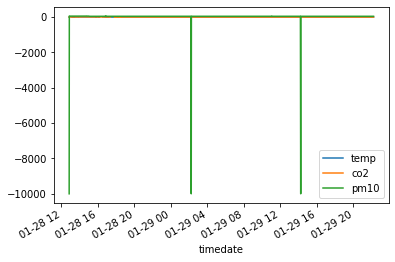

key:  refined_data Data Leangth: 2003 Data NaN Length: temp    84
co2     34
pm10     3
dtype: int64
                     temp  co2    pm10
timedate                              
2021-01-28 12:51:00   3.0  5.0 -9999.0
2021-01-28 12:52:00   3.0  5.0    64.0
2021-01-28 12:53:00   NaN  6.0    56.0
2021-01-28 12:54:00   NaN  7.0    59.0
2021-01-28 12:55:00   NaN  7.0    59.0
...                   ...  ...     ...
2021-01-29 22:09:00   1.0  3.0    48.0
2021-01-29 22:10:00   1.0  3.0    49.0
2021-01-29 22:11:00   1.0  3.0    48.0
2021-01-29 22:12:00   1.0  3.0    48.0
2021-01-29 22:13:00   1.0  3.0    48.0

[2003 rows x 3 columns]


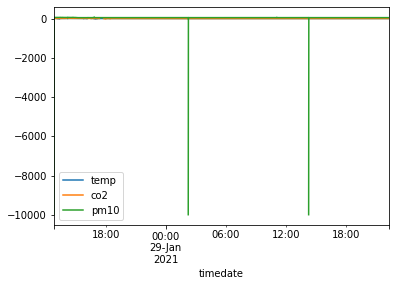

key:  datawithMoreCertainNaN Data Leangth: 2003 Data NaN Length: temp    84
co2     34
pm10     6
dtype: int64
                     temp  co2  pm10
timedate                            
2021-01-28 12:51:00   3.0  5.0   NaN
2021-01-28 12:52:00   3.0  5.0  64.0
2021-01-28 12:53:00   NaN  6.0  56.0
2021-01-28 12:54:00   NaN  7.0  59.0
2021-01-28 12:55:00   NaN  7.0  59.0
...                   ...  ...   ...
2021-01-29 22:09:00   1.0  3.0  48.0
2021-01-29 22:10:00   1.0  3.0  49.0
2021-01-29 22:11:00   1.0  3.0  48.0
2021-01-29 22:12:00   1.0  3.0  48.0
2021-01-29 22:13:00   1.0  3.0  48.0

[2003 rows x 3 columns]


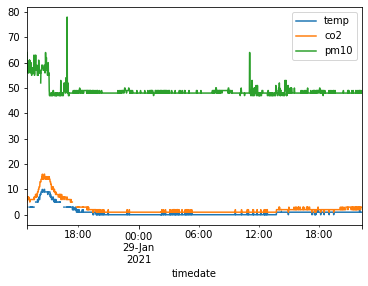

key:  datawithMoreUnCertainNaN Data Leangth: 2003 Data NaN Length: temp    84
co2     34
pm10     0
dtype: int64
                     temp  co2       pm10
timedate                                 
2021-01-28 12:51:00   3.0  5.0  48.888833
2021-01-28 12:52:00   3.0  5.0  64.000000
2021-01-28 12:53:00   NaN  6.0  56.000000
2021-01-28 12:54:00   NaN  7.0  59.000000
2021-01-28 12:55:00   NaN  7.0  59.000000
...                   ...  ...        ...
2021-01-29 22:09:00   1.0  3.0  48.000000
2021-01-29 22:10:00   1.0  3.0  49.000000
2021-01-29 22:11:00   1.0  3.0  48.000000
2021-01-29 22:12:00   1.0  3.0  48.000000
2021-01-29 22:13:00   1.0  3.0  48.000000

[2003 rows x 3 columns]


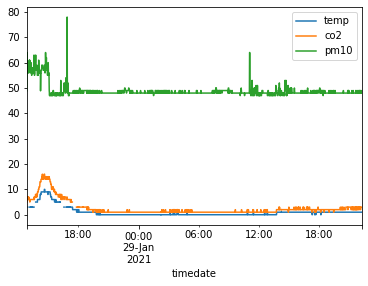

key:  imputed_data Data Leangth: 2003 Data NaN Length: pm10    0
dtype: int64
                          pm10
timedate                      
2021-01-28 12:51:00  48.888833
2021-01-28 12:52:00  64.000000
2021-01-28 12:53:00  56.000000
2021-01-28 12:54:00  59.000000
2021-01-28 12:55:00  59.000000
...                        ...
2021-01-29 22:09:00  48.000000
2021-01-29 22:10:00  49.000000
2021-01-29 22:11:00  48.000000
2021-01-29 22:12:00  48.000000
2021-01-29 22:13:00  48.000000

[2003 rows x 1 columns]


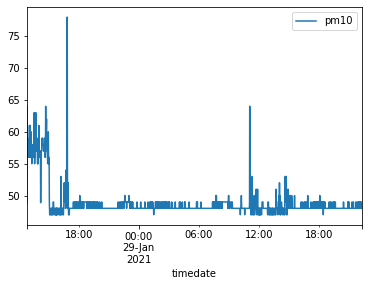

In [11]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    print(temp)
    temp.plot()
    plt.show()

In [12]:
import pandas as pd
np.random.seed(1997)
df = pd.DataFrame(np.random.choice([np.nan,1], p=(0.8,0.2),size=(10,10)))
print (df)

df1 = df.dropna(thresh=2, axis=1)
print (df1)


     0   1    2    3    4    5    6    7   8    9
0  NaN NaN  NaN  1.0  1.0  NaN  NaN  NaN NaN  NaN
1  1.0 NaN  1.0  NaN  NaN  NaN  NaN  NaN NaN  NaN
2  NaN NaN  NaN  NaN  NaN  1.0  1.0  NaN NaN  NaN
3  NaN NaN  NaN  NaN  1.0  NaN  NaN  NaN NaN  NaN
4  NaN NaN  NaN  NaN  NaN  1.0  NaN  NaN NaN  1.0
5  NaN NaN  NaN  1.0  1.0  NaN  NaN  1.0 NaN  1.0
6  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN
7  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN
8  NaN NaN  NaN  NaN  NaN  NaN  NaN  1.0 NaN  NaN
9  1.0 NaN  NaN  NaN  1.0  NaN  NaN  1.0 NaN  NaN
     0    3    4    5    7    9
0  NaN  1.0  1.0  NaN  NaN  NaN
1  1.0  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  1.0  NaN  NaN
3  NaN  NaN  1.0  NaN  NaN  NaN
4  NaN  NaN  NaN  1.0  NaN  1.0
5  NaN  1.0  1.0  NaN  1.0  1.0
6  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  1.0  NaN
9  1.0  NaN  1.0  NaN  1.0  NaN
